<a href="https://colab.research.google.com/github/JHaerr/CS4372/blob/main/linear_regression_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/TMM8540/Into-to-ml-data/main/cleaned_MPG_DATA.csv', index_col = 0)

In [ ]:
#checking for missing values, data type errors, outliers
for col in df.columns:
  try:
    mean = np.mean(df[col])
  except:
    print('failed')
# df.plot(kind = 'kde', subplots = True)
df.describe()

,MPG,Cylinders,displacement,horsepower,weight,acceleration,age
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.178392,2970.424623,15.568090,46.989950
std,7.815984,1.701004,104.269838,38.294837,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,41.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,44.000000
50%,23.000000,4.000000,148.500000,92.500000,2803.500000,15.500000,47.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,50.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,53.000000


array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

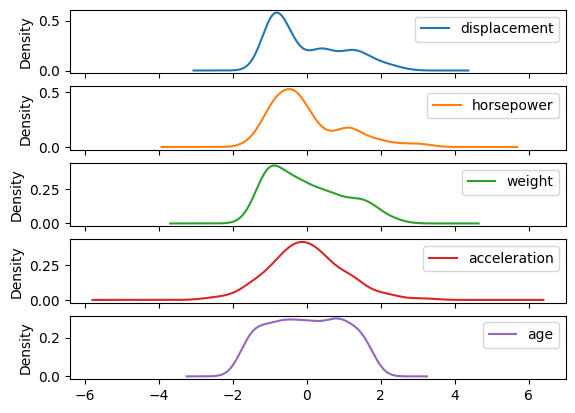

In [ ]:
# convert categorical variables
df.Cylinders = df.Cylinders.astype('category')


#standardizing and normalizing
df_numeric = df[df.columns[2:]]
s = StandardScaler()
X_numeric = pd.DataFrame(s.fit(df_numeric).fit_transform(df_numeric), columns = df_numeric.columns)

X = pd.concat([X_numeric, df.Cylinders], axis =1)
Y = df['MPG']

X_numeric.plot(kind = 'kde', subplots = True)

In [ ]:
X.dtypes

displacement     float64
horsepower       float64
weight           float64
acceleration     float64
age              float64
Cylinders       category
dtype: object

<ipython-input-6-f4d93765b789>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(), annot = True)


<Axes: >

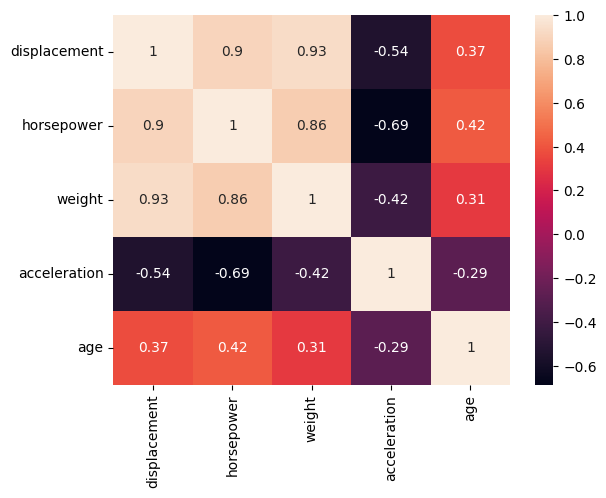

In [ ]:
import seaborn as sns
sns.heatmap(X.corr(), annot = True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [ ]:
#statistical approach
import statsmodels.api as sm

X_train = sm.add_constant(X_train, prepend=False)
X_test = sm.add_constant(X_test, prepend=False)

model1 = sm.OLS(Y_train, X_train)
result1 = model.fit()
print(result1.summary())

X_train_2 = X_train.drop(['acceleration', 'horsepower', 'Cylinders', 'displacement'], axis = 1)
model2 = sm.OLS(Y_train, X_train_2)
result2 = model2.fit()
print(result2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    MPG   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1753.
Date:                Wed, 20 Sep 2023   Prob (F-statistic):                   5.74e-237
Time:                        00:48:44   Log-Likelihood:                         -904.30
No. Observations:                 318   AIC:                                      1821.
Df Residuals:                     312   BIC:                                      1843.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
#gradient descent approach
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_gradient_descent = LinearRegression().fit(X_train_2, Y_train)
model_gradient_descent.coef_


array([-5.56709277, -2.74809466,  0.        ])

In [ ]:
print(X_train_2)

       weight       age  const
248 -1.383845 -0.538847    1.0
42   2.346452  1.356642    1.0
238 -1.058700 -0.268063    1.0
127 -0.082084  0.544290    1.0
56  -1.200582  1.356642    1.0
..        ...       ...    ...
73   1.333182  1.085858    1.0
118 -0.960566  0.815074    1.0
189  1.172384  0.002721    1.0
206 -0.479352  0.002721    1.0
355 -0.899084 -1.351199    1.0

[318 rows x 3 columns]
